# C - *Forstbotanischer Garten* 3D

In [1]:
# To have interactive plots
%matplotlib notebook 

# To have static plots
# %matplotlib inline

import numpy
import pandas
from matplotlib import pyplot

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

numpy.set_printoptions( precision=4, suppress=True )

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
df = pandas.read_csv( '../data/foboga.csv', parse_dates=['Timestamp'] )
df.set_index( ['Timestamp'], inplace=True, drop=True )

station_4 = df[ df['Station']==4 ]

In [4]:
datacols = [ 'Temperature (2m)', 'Humidity (2m)', 'PAR Radiation (2m)' ]
datacols = [ 'Temperature (2m)', 'Temperature (-0.25m)', 'Temperature (-0.55m)' ]
datacols = [ 'Temperature (2m)', 'Humidity (2m)', 'Temperature (-0.25m)' ]
datacols = [ 'Temperature (2m)', 'PAR Radiation (2m)', 'Temperature (-0.25m)' ]

station_4 = station_4[ datacols ]

# station_4 = station_4[ station_4['PAR Radiation (2m)']>1 ] # Uncomment to analize during daytime only

station_4.corr()

,Temperature (2m),PAR Radiation (2m),Temperature (-0.25m)
Temperature (2m),1.000000,0.590525,0.868171
PAR Radiation (2m),0.590525,1.000000,0.384050
Temperature (-0.25m),0.868171,0.384050,1.000000


<IPython.core.display.Javascript object>


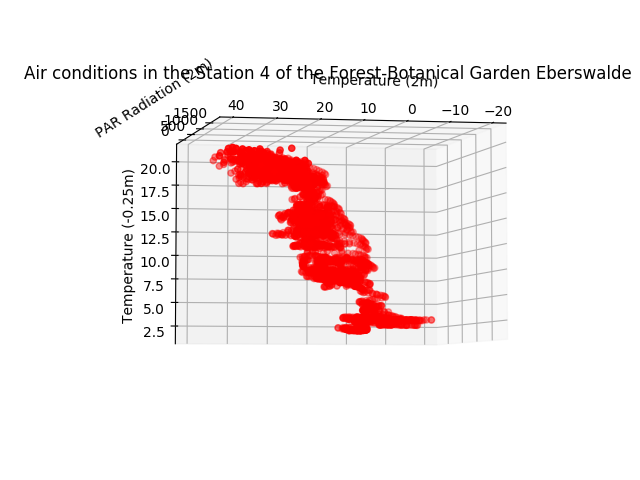

In [5]:
fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')

#x = station_4[ 'Temperature (2m)' ]
#y = station_4[ 'Humidity (2m)' ]
#z = station_4[ 'PAR Radiation (2m)' ]

x = station_4[ datacols[0] ]
y = station_4[ datacols[1] ]
z = station_4[ datacols[2] ]

ax.scatter(x, y, z, c='r', marker='o')

#ax.set_xlabel( 'Temperature (2m)' )
#ax.set_ylabel( 'Humidity (2m)' )
#ax.set_zlabel( 'PAR Radiation (2m)' )

ax.set_xlabel( datacols[0] )
ax.set_ylabel( datacols[1] )
ax.set_zlabel( datacols[2] )


pyplot.title( 'Air conditions in the Station 4 of the Forest-Botanical Garden Eberswalde' )

pyplot.show()

In [76]:
scaler = StandardScaler()
scaler.fit( station_4 )
# print( scaler.mean_, scaler.var_ )
scaled_data = scaler.transform( station_4 )

In [77]:
pca = PCA()
pca.fit( scaled_data ) # The function expects variables to be rows!

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [78]:
pca.components_

array([[ 0.6415,  0.4853,  0.5942],
       [-0.1703,  0.8453, -0.5065],
       [ 0.748 , -0.2237, -0.6248]])

In [79]:
pca.explained_variance_

array([2.2514, 0.6511, 0.0982])

In [80]:
pca.explained_variance_ratio_

array([0.7503, 0.217 , 0.0327])

<IPython.core.display.Javascript object>


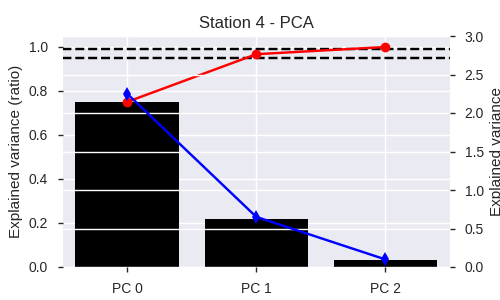

In [82]:
fig, ax = pyplot.subplots( nrows=1, ncols=1, figsize=(5,3) )

ax.bar( list( range( 3 )), pca.explained_variance_ratio_, color='black' )
ax.plot( list( range( 3 )), pca.explained_variance_ratio_.cumsum(), '-', marker='o', color='red' )
ax.hlines( 0.95, -1, 7, linestyle='--', color='black' )
ax.hlines( 0.99, -1, 7, linestyle='--', color='black' )

axR = ax.twinx()
axR.yaxis.tick_right()
axR.plot( list( range( 3 )), pca.explained_variance_, '-', marker='d', color='blue' )
axR.set_ylim( [0,3] )

ax.set_xticks( list( range( 3 )) )
ax.set_xticklabels( [ 'PC '+str(i) for i in range(3) ] )

ax.set_ylabel( 'Explained variance (ratio)' )
axR.set_ylabel( 'Explained variance' )

ax.set_xlim( [-0.5, 2.5] )
pyplot.title( 'Station 4 - PCA' )
#plt.savefig( './scree/Station ' + str(station_n) + '_scree.png' )

pyplot.show()